# Introduction to neural network classification with TensorFlow

In this notebook, we're going to learn how to write neural networks for classification

An classification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [2]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

Our data is a little hard to understand, let's visualize it!

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


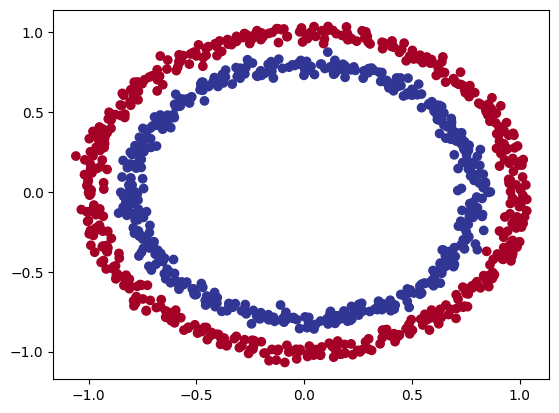

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

## Input and Output shapes

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we're working with
len(X), len(y)

(1000, 1000)

## Steps in modelling

1. Create, input the model
2. Compile the model
3. fit the model
4. Evaluate the model
5. Tweak
6. Evaluate


In [8]:
import tensorflow as tf

In [9]:
#Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 7.0760 - accuracy: 0.5020
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000


In [10]:
# Let's try and improve our moodel by training for longer
model_1.fit(X,y,epochs=200,verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy, it's performing as if it's guessing

So let's step things up a notch and add an extra layer.

In [11]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Complie the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [12]:
# 4. Evaluate the model
model_2.evaluate(X,y)

32/32 [==============================] - 1s 5ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932898163795471, 0.5]

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - add more layers, increase number of hidden units.
2. Compile a model - choose a different optimization function.
3. Fitting a model - more epochs

In [13]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [14]:
# 4. Evaluate the model
model_3.evaluate(X,y)

32/32 [==============================] - 1s 4ms/step - loss: 0.6975 - accuracy: 0.5040


[0.697486400604248, 0.5040000081062317]

In [15]:
import numpy as np

To visualize our model's prediction, let's create a function 'plot_prediction_boundary()', this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [16]:
import numpy as np
def plot_decisions_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting X
  Resource:
  1. cs231n
  2. Made with ML github
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,0].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  # Create X value
  x_in = np.c_[xx.ravel(), yy.ravel()]

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred=np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 4ms/step
doing binary classification


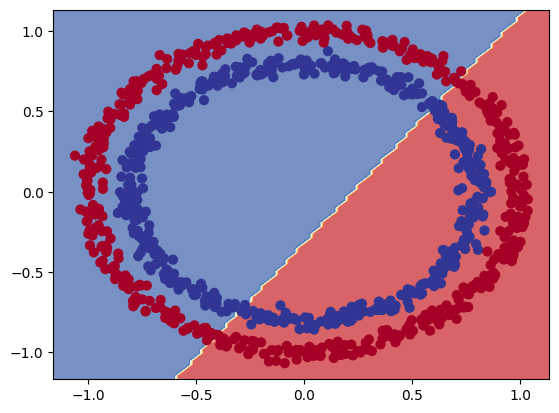

In [17]:
# Check out the prediction our model is making
plot_decisions_boundary(model=model_3,
                       X=X,
                       y=y)

In [18]:
x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
y_min, y_max = X[:,1].min() - 0.1, X[:,0].max() + 0.1
x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1337117525463374)

In [19]:
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
xx, xx.shape, yy, yy.shape

(array([[-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        ...,
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175]]),
 (100, 100),
 array([[-1.16776832, -1.16776832, -1.16776832, ..., -1.16776832,
         -1.16776832, -1.16776832],
        [-1.14452104, -1.14452104, -1.14452104, ..., -1.14452104,
         -1.14452104, -1.14452104],
        [-1.12127377, -1.12127377, -1.12127377, ..., -1.12127377,
         -1.12127377, -1.12127377],
        ...,
        [ 1.08721721,  1.08721721,  1.087

In [20]:
x_in = np.c_[xx.ravel(), yy.ravel()]
x_in

array([[-1.15950246, -1.16776832],
       [-1.13633868, -1.16776832],
       [-1.1131749 , -1.16776832],
       ...,
       [ 1.08738419,  1.13371175],
       [ 1.11054797,  1.13371175],
       [ 1.13371175,  1.13371175]])

In [21]:
# Let's see if our model can be used for a regression problem
tf.random.set_seed(42)

#Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100,1100, 5) # y = x+5
X_regression, y_regression

# Split our training data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100


ValueError: ignored

We compiled our model for a binary classification problem.

But... we're now working on a regression problem, let's change the model to suit our data.

In [ ]:
# setup random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model, this time with specific loss function
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

In [ ]:
# Make prediction with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

#The missing piece: Non-linearity

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history=model_4.fit(X,y, epochs=100)

In [ ]:
# Check out our data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
# Check the decision boundary for our latest model
plot_decisions_boundary(model=model_4,
                       X=X,
                       y=y)

Let's try build our first neural network with non-linear activation function

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Ceate a model with a non-linear
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
model_5.fit(X, y, epochs=100)

In [ ]:
# Time to replicate the multilayer neural network from TF play ground

# Set the random seed
tf.random.set_seed(42)
# 1. Create the model
model_6=tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
model_6.fit(X, y, epochs=250)

In [ ]:
# Evaluate the model
model_6.evaluate(X, y)

In [ ]:
# how do our model
plot_decisions_boundary(model_6, X, y)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
model_7.fit(X, y, epochs=100)

In [ ]:
# 4. Evaluate our model
model_7.evaluate(X, y)

In [ ]:
# Visualize our incredible metrics
plot_decisions_boundary(model_7, X, y)

**Question:** What's wrong the predictions we have made? Are we really evaluating our model correctly ?

Hint: What data did the model learn on, what data did the model evaluate on?

**Note:** The combination of linear and non-linear function is one of the key fundamental of neural networks.

Now we've disscued the concept of linear and non linear, let's see them in action

In [ ]:
# Create a toy a tensor (similar to the data we pass into our model)
A = tf.cast(tf.range(-10,10), tf.float32)
A

In [ ]:
# Visualize our toy tensor
plt.plot(A)

In [ ]:
# Let's start by replicating sigmoid - sigmoid(x) = 1/(1+exp(-x))
def sigmoid(x):
  return 1/(1+tf.exp(-x))

# Use the sigmoid function on our toy tensor:
sigmoid(A)

In [ ]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A));

In [ ]:
# Let's recreate relu function
def relu(x):
  return tf.maximum(0,x)

# Pass our toy tensor to our custom relu function
relu(A)

In [ ]:
# Plot ReLU modified tensor
plt.plot(relu(A))

In [ ]:
# Let's try linear activation function
tf.keras.activations.linear(A)

In [ ]:
# Does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A));

In [ ]:
# DoeS A even change?
A == tf.keras.activations.linear(A)

## Evaluating and improving our classification

So far we've been training and testing in the some dataset => not good

So let's create a training and test set.

In [ ]:
# Check how many examples we have
len(X)

In [ ]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
# Let's recreate a model to fit on the training data and evaluate on the test

# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_7)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

In [ ]:
model_8.evaluate(X_test, y_test)

In [ ]:
# Plot the decision boundary for training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decisions_boundary(model_8, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decisions_boundary(model_8, X_test, y_test)
plt.show();

## Plot the loss (or training) curves

In [ ]:
# convert the history object into DataFrame
pd.DataFrame(history.history)

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves");

**Note:** For many problems, the loss function going down means the model is improving (The predictions it's making are getting closer to the ground truth labels)

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training)  we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your *while* its training.
* Another model
* A modified loss curves plot

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_9=tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))

# Fit the model
history_9=model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

In [ ]:
# Check out the history
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel="epochs")

In [ ]:
# Plot the learning rate vs the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("learning rate vs loss")

In [ ]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

In [ ]:
# Let's try using a higher ideal learning rate with the same model as before

# Set random seed
tf.random.set_seed(42)

# Create the model
model_10=tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])

# Fit the model
history_10=model_10.fit(X_train, y_train, epochs=20)

In [ ]:
# Evaluate model 10 on the test dataset
model_10.evaluate(X_test, y_test)

In [ ]:
# Evaluate model 8 on the test dataset
model_8.evaluate(X_test, y_test)

In [ ]:
# Plot the decision boundaries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decisions_boundary(model_10, X_train, y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decisions_boundary(model_10, X_test, y_test)
plt.show()

## More classification evaluation methods

Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classificaiton report (from scikit-learn)

In [ ]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

How about a confusion matrix?

In [ ]:
# Create a confusiom matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

Our prediction array come out in **prediction probability**, the standard output from sigmoid(or softmax) activation functions.

In [ ]:
# Convert prediction probability to binary format and view the first 10
tf.round(y_preds[:10])

In [ ]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

How about we prettify our confusion matrix?

In [ ]:
import itertools
figsize=(10,10)

# Create the confusion matrix
cm=confusion_matrix(y_test, tf.round(y_preds))
cm_norm=cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] #normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels=classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()


# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set the threshold for different colors
threshold = (cm.max() + cm.min())/2

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i,j]>threshold else "black",
           size=15)

## Working with a larger example (multiclass classification)

When you have more than 2 classes as an option, it's known as multi-class classification.
* This mean if you have 3 different classes, it's multi-class classification.
* It also means if you have 100 different classes, it's multi-class classification.

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.



In [22]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [23]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Trainning label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [24]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

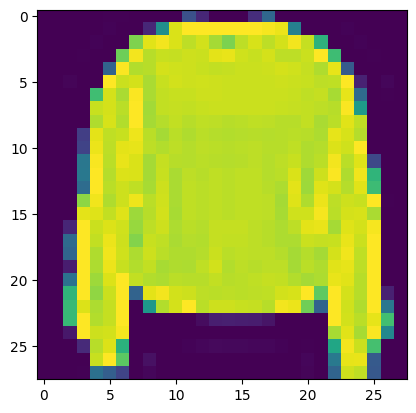

In [25]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [26]:
# Check out samples label
train_labels[7]

2

In [27]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'Coat')

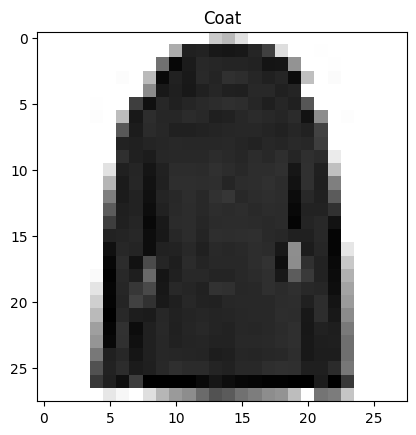

In [28]:
# Plot an example image and its label
index_of_choice = 2000
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

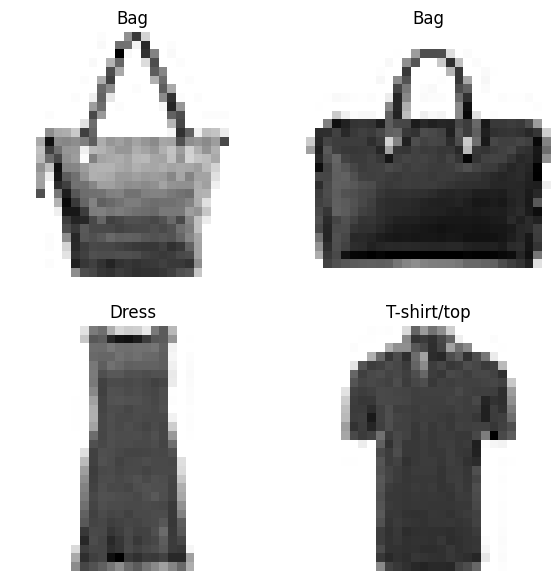

In [29]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index=random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, howerver, we're going to tweak a few things
* Input shape = 28x28 (the shape of one image)
* Output shape = 10 (one per class)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
  * If your labels are one_hot encoded, use CategoricalCrossentropy()
  * If your labels are integer, use SparseCategoricalCrossentropy()
* Output layer activation = softmax(not sigmoid)

In [30]:
#our data needs to be flattened (from 28*28 to none 784)
flatten_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28))
])

flatten_model.output_shape

(None, 784)

In [31]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [32]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data, tf.one_hot(train_labels, depth=10), epochs=10, validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3066 - accuracy: 0.0990 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [33]:
# Check the model summary
model_11.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 4)                 3140      
                                                                 
 dense_7 (Dense)             (None, 4)                 20        
                                                                 
 dense_8 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (normalized), this means they like to have the numbers in the tensors between 0 & 1

In [35]:
# We can get our training and testing data between 0 and 1 by dividing by the maximum
train_data_norm=train_data/255.0
test_data_norm=test_data/255.0

# Check the min and max value of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [37]:
# Now our data is normalized, let's build a model to find patterns in it

#Set random seed
tf.random.set_seed(42)

# Create a model (same as 11)
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
norm_history = model_12.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1096 - accuracy: 0.6173 - val_loss: 0.8634 - val_accuracy: 0.7164
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7633 - accuracy: 0.7445 - val_loss: 0.7298 - val_accuracy: 0.7577
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6609 - accuracy: 0.7667 - val_loss: 0.6601 - val_accuracy: 0.7681
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6198 - accuracy: 0.7789 - val_loss: 0.6341 - val_accuracy: 0.7713
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5975 - accuracy: 0.7849 - val_loss: 0.6204 - val_accuracy: 0.7744
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5838 - accuracy: 0.7894 - val_loss: 0.6127 - val_accuracy: 0.7819
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5722 - accuracy: 0.7930 - val_loss: 0.6227 - val_accuracy:

**Note**: neural networks tend to prefer data in numerical form as well as scaled/normalized

<Axes: title={'center': 'Normalized data'}>

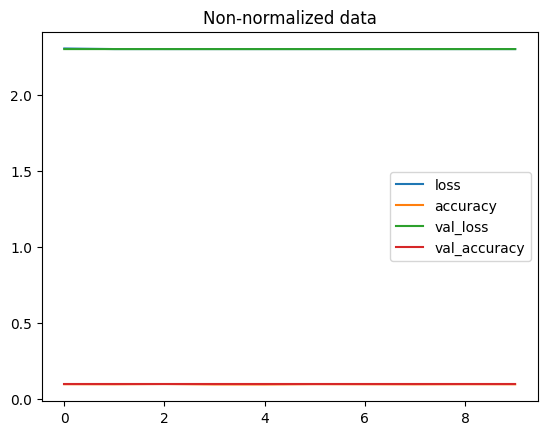

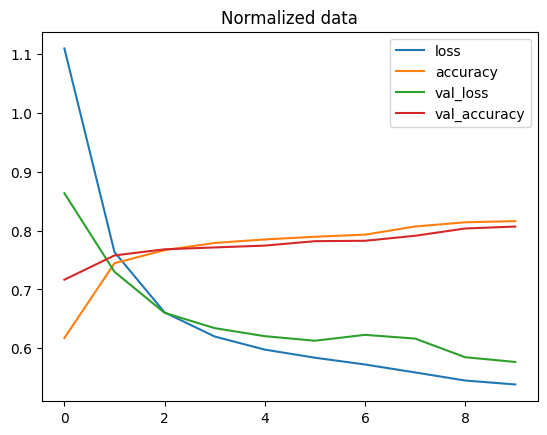

In [38]:
import pandas as pd
# Plot non-normalizes data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
pd.DataFrame(norm_history.history).plot(title="Normalized data")

**Note**: same model with even slightly different data can produce dramatically different results. When you compare models, it's important to make sure you're comparing them on the same criteria (same architecture but different data, same data but different architecture)

## Finding the ideal learning rate

In [40]:
tf.random.set_seed(42)

# Create model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data = (test_data_norm, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0179 - accuracy: 0.6104 - val_loss: 0.7255 - val_accuracy: 0.7276 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6562 - accuracy: 0.7714 - val_loss: 0.6410 - val_accuracy: 0.7819 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5913 - accuracy: 0.7968 - val_loss: 0.6003 - val_accuracy: 0.7958 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5687 - accuracy: 0.8037 - val_loss: 0.5946 - val_accuracy: 0.8046 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5574 - accuracy: 0.8068 - val_loss: 0.5825 - val_accuracy: 0.8051 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5490 - accuracy: 0.8108 - val_loss: 0.5954 - val_accuracy: 0.7979 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 8s

Text(0.5, 1.0, 'Finding the ideal learning rate')

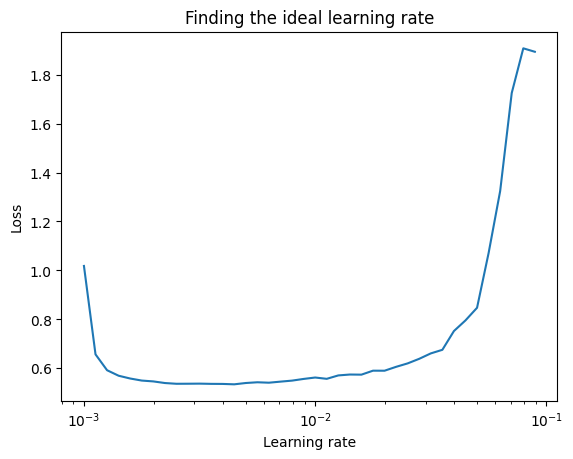

In [44]:
# Plot the learning rate decay curver
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [46]:
# Let's refit the model with the ideal learning rate

# Set the random seed
tf.random.set_seed(42)

# Create model
model_14=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

# Fit the model
history_14 = model_14.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data = (test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0368 - accuracy: 0.6072 - val_loss: 0.7853 - val_accuracy: 0.7299
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7127 - accuracy: 0.7490 - val_loss: 0.6678 - val_accuracy: 0.7560
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6069 - accuracy: 0.7797 - val_loss: 0.6311 - val_accuracy: 0.7617
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5765 - accuracy: 0.7903 - val_loss: 0.5868 - val_accuracy: 0.7880
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5577 - accuracy: 0.7995 - val_loss: 0.5968 - val_accuracy: 0.7833
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5430 - accuracy: 0.8055 - val_loss: 0.5766 - val_accuracy: 0.7980
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5312 - accuracy: 0.8127 - val_loss: 0.5654 - val_accuracy:

## Evaluating our multi-class classification model

To evaluate our multi_class classification model
* Evaluate its performance using other classification metrics (such as confusion matrix)
* Asses some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an appliation

Let's go through the top 2...

In [47]:
# Create a confusion matrix

import itertools
from sklearn.metrics import confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):
  # Create the confusion matrix
  cm=confusion_matrix(y_true, y_pred)
  cm_norm=cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] #normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # set labels to be classes
  if classes:
    labels=classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()


  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min())/2

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i,j]>threshold else "black",
            size=text_size)

In [48]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [50]:
# Make some predictions with our model
y_probs = model_14.predict(test_data_norm) #probs: prediction probability

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 3ms/step


array([[1.4914098e-06, 3.9774281e-11, 4.1953685e-09, 2.1063643e-06,
        1.2190567e-07, 2.9885218e-01, 8.9560663e-06, 1.2914623e-01,
        1.0731047e-02, 5.6125790e-01],
       [2.9785250e-04, 1.0438189e-08, 8.2980865e-01, 7.6268583e-07,
        6.8594687e-02, 9.1308145e-25, 1.0129646e-01, 0.0000000e+00,
        1.4417304e-06, 2.4593295e-37],
       [7.0803549e-07, 9.9949437e-01, 7.2755953e-05, 2.9172323e-04,
        1.4006636e-04, 1.5022709e-27, 3.0672078e-07, 1.4652319e-29,
        1.1011901e-11, 2.8811118e-29],
       [2.7104616e-06, 9.9827921e-01, 6.8970287e-05, 1.3221714e-03,
        3.2560545e-04, 3.5270091e-23, 1.4111771e-06, 1.0342909e-23,
        8.7597107e-10, 3.5776329e-24],
       [1.2918016e-01, 1.3538031e-05, 1.3246271e-01, 1.2856924e-02,
        3.9694242e-02, 2.1248574e-12, 6.8276393e-01, 1.0929957e-21,
        3.0284915e-03, 2.4622927e-16]], dtype=float32)

**Note**: remember to make predition on the same kind of data  your model was trained on (if your model was trained on normalized data, you want to make prediction on normalized data)

In [53]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([1.4914098e-06, 3.9774281e-11, 4.1953685e-09, 2.1063643e-06,
        1.2190567e-07, 2.9885218e-01, 8.9560663e-06, 1.2914623e-01,
        1.0731047e-02, 5.6125790e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [54]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [55]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[710,   3,  24,  91,   7,   4, 149,   0,  12,   0],
       [  0, 950,  11,  32,   5,   0,   2,   0,   0,   0],
       [ 16,   5, 690,  11, 162,   0, 111,   0,   5,   0],
       [ 37,  19,  11, 828,  43,   0,  54,   1,   7,   0],
       [  1,   2,  99,  23, 790,   0,  78,   0,   7,   0],
       [  1,   0,   0,   1,   0, 908,   0,  47,  13,  30],
       [113,   4, 108,  53, 141,   0, 562,   0,  18,   1],
       [  0,   0,   0,   0,   0,  37,   0, 936,   3,  24],
       [  0,   1,   2,   8,   8,   9,  48,   5, 919,   0],
       [  1,   0,   0,   1,   0,  25,   0,  52,   5, 916]])

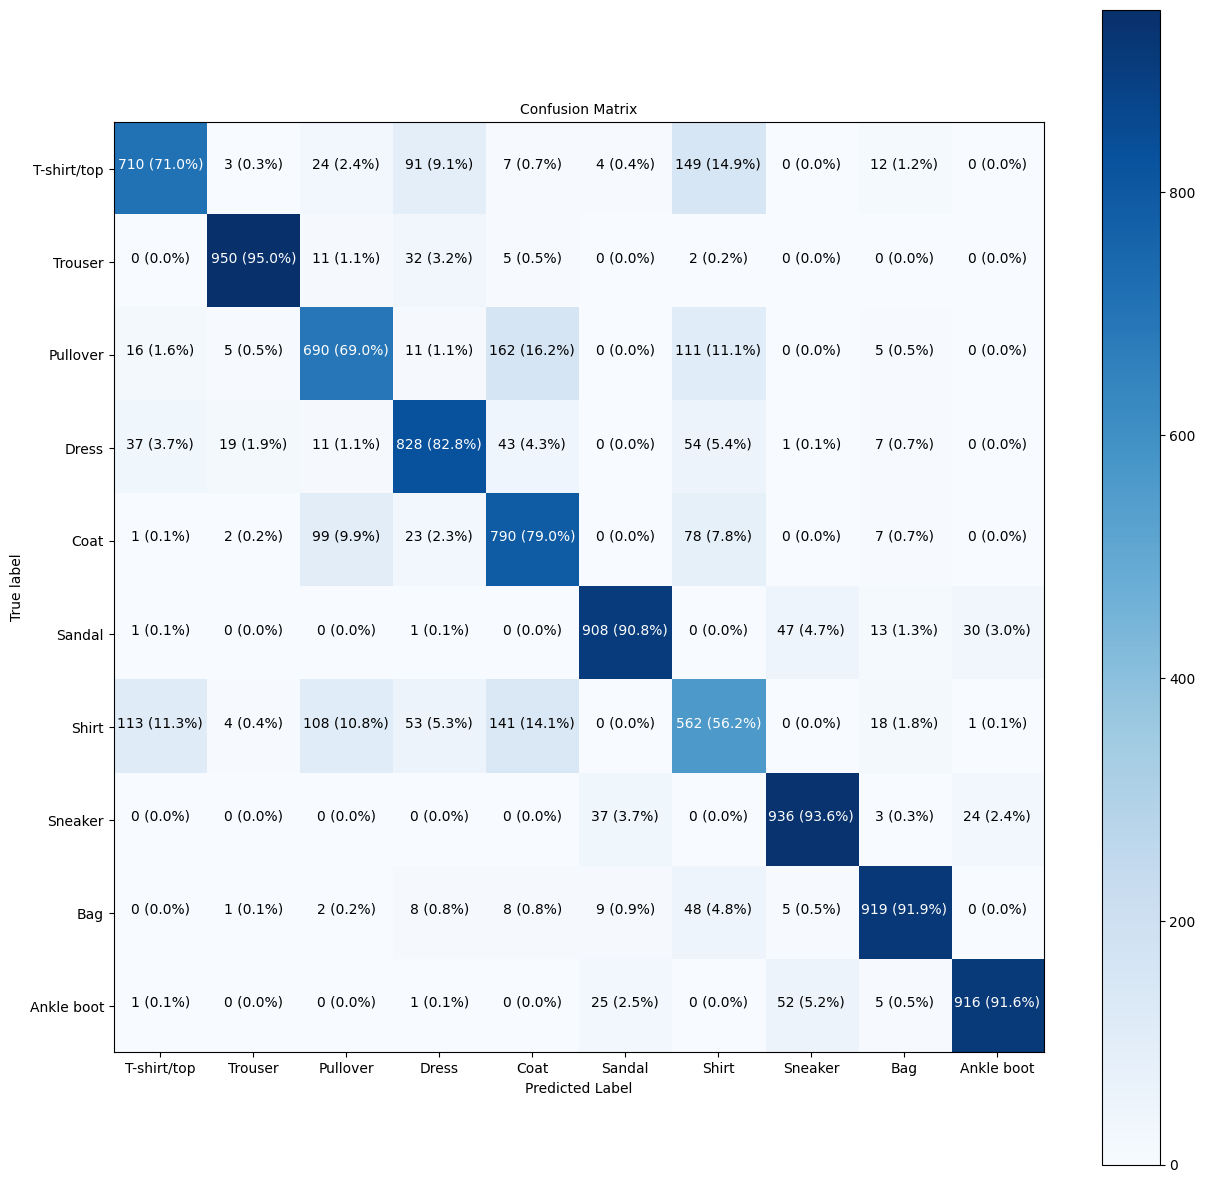

In [56]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15,15),
                      text_size=10)

**Note:** often when working with images and other forms of visual data, it's a good idea to visualize as much as possivle to develop a further understanding the inputs and outputs of your models.

How about we create a fun little function for
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label & predicted label

In [64]:
import random
def plot_random_image(model, images, true_labels, classes):
  """
  Pick a random image, plots it and label it with a prediction and truth label.
  """
  #set up random integer
  i=random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color)

1/1 [==============================] - 0s 33ms/step


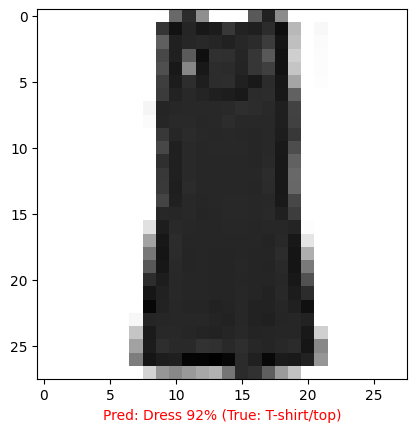

In [71]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

## What patterns is our model learning?

In [72]:
# Find the layers of our most recent model
model_14.layers

In [73]:
# Extract a particular layer
model_14.layers[1]

In [74]:
# Get the patterns of layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.04673488, -0.19367957,  0.6830747 ,  0.06096746],
        [-0.31848517, -0.7560372 ,  0.7366904 , -0.3307518 ],
        [-1.0759175 , -0.13555264,  0.92363   , -0.2888545 ],
        ...,
        [ 0.0538352 , -0.1277795 ,  0.21708918, -0.40018013],
        [-0.06275503,  0.58394843, -0.26813188, -0.8238532 ],
        [-0.06673966, -0.21246392,  0.35857108, -0.02687454]],
       dtype=float32),
 (784, 4))

Now let's check out biases vectors

In [75]:
# Bias and biases shapes
biases, biases.shape

(array([ 0.45018947, -0.5378213 ,  1.3109739 ,  0.69810414], dtype=float32),
 (4,))

Every neuron has a bias vector. Each of these if paired with a weight matrix.

The bias vector get initialized as zeros (at least in tensorflow dense layers)

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layers.

In [76]:
model_14.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 4)                 3140      
                                                                 
 dense_19 (Dense)            (None, 4)                 20        
                                                                 
 dense_20 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


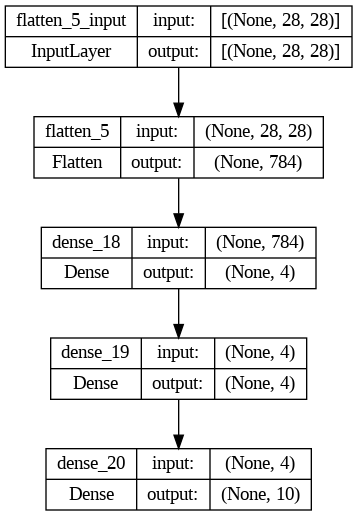

In [77]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)